In [118]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)

ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(city_data, ride_data, how='outer', on='city')

# Display the data table for preview
combined_data_df.head()




,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

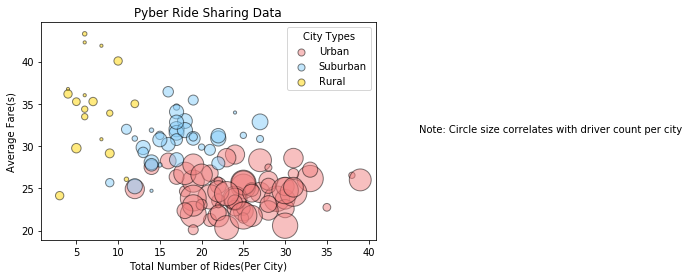

In [122]:
# Obtain the x and y coordinates for each of the three city types
combined_data_df.set_index("city", inplace=True)

urban_city = combined_data_df.loc[(combined_data_df["type"]=="Urban"), ["fare", "ride_id", "driver_count"]]
urban_city_group = urban_city.groupby('city')
urban_avg = urban_city_group["fare"].mean()
urban_ride = urban_city_group["ride_id"].count()
urban_driver = urban_city_group["driver_count"].mean()

suburban_city = combined_data_df.loc[(combined_data_df["type"]=="Suburban"), ["fare", "ride_id", "driver_count"]]
suburban_city_group = suburban_city.groupby('city')
suburban_avg = suburban_city_group["fare"].mean()
suburban_ride = suburban_city_group["ride_id"].count()
suburban_driver = suburban_city_group["driver_count"].mean()

rural_city = combined_data_df.loc[(combined_data_df["type"]=="Rural"), ["fare", "ride_id", "driver_count"]]
rural_city_group = rural_city.groupby('city')
rural_avg = rural_city_group["fare"].mean()
rural_ride = rural_city_group["ride_id"].count()
rural_driver = rural_city_group["driver_count"].mean()


# Build the scatter plots for each city types

plt.scatter(urban_ride, urban_avg, s = (urban_driver)*10, color="lightcoral", edgecolors="black", label="Urban", alpha = .5)
plt.scatter(suburban_ride, suburban_avg, s = (suburban_driver)*10, color="lightskyblue", edgecolors="black", label="Suburban", alpha = .5)
plt.scatter(rural_ride, rural_avg, s = (rural_driver)*10, color="gold", edgecolors="black", label="Rural", alpha = .5)
    
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare(s)")

# Create a legend

lgnd = plt.legend(loc=1, title="City Types")
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.figtext(1.0, .5, "Note: Circle size correlates with driver count per city")

# Save Figure
plt.savefig("bubble_plot_ride_data")

In [123]:
# Show plot
plt.show()

## Total Fares by City Type

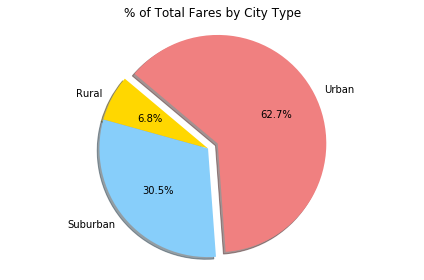

In [134]:
# Calculate Type Percents
type_group = combined_data_df.groupby("type")

total_fare = type_group["fare"].sum()

# Build Pie Chart
types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(total_fare, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.tight_layout()

# Save Figure
plt.savefig("pie_chart_total_fares")

In [13]:
# Show Figure
plt.show()

## Total Rides by City Type

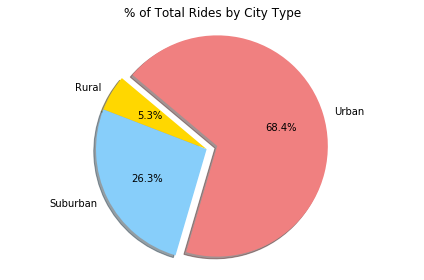

In [133]:
# Calculate Ride Percents
total_rides = type_group["ride_id"].count()

# Build Pie Chart
types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(total_rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.tight_layout()

# Save Figure
plt.savefig("pie_chart_total_rides")

In [15]:
# Show Figure
plt.show()

## Total Drivers by City Type

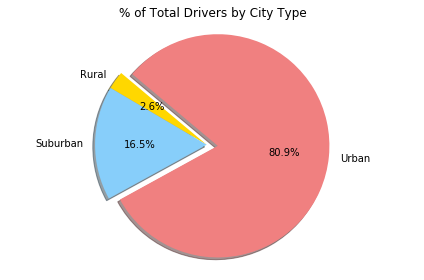

In [135]:
# Calculate Driver Percents

total_drivers = city_data.groupby('type')['driver_count'].sum()

# Build Pie Charts
types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(total_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.tight_layout()

# Save Figure
plt.savefig("pie_chart_total_drivers")

In [132]:
# Show Figure
plt.show()

In [ ]:
1.       People in the urban areas use ride sharing more often than people in rural and suburban areas. 
         The further away from the city, the less that people use the service.

2.       It is more expensive to use ride sharing in the rural areas. People need to go a further distance and therefore, 
         it costs them more money.

3.       There are more drivers in the urban areas than in rural and suburban areas. More drivers are needed in the urban 
         areas because of the demand. 

